import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/serge/.cache/kagglehub/datasets/asaniczka/uk-optimal-product-price-prediction/versions/3/amz_uk_price_prediction_dataset.csv")

df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [37]:
# Which are the top 5 most listed product categories? 

category_frequency = df['category'].value_counts().head(10).reset_index()

category_frequency.columns = ['category', 'frequency']
category_frequency

,category,frequency
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
5,Manicure & Pedicure Products,18940
6,Skin Care,18769
7,Make-up,18756
8,Hair Care,18735
9,Fragrances,18564


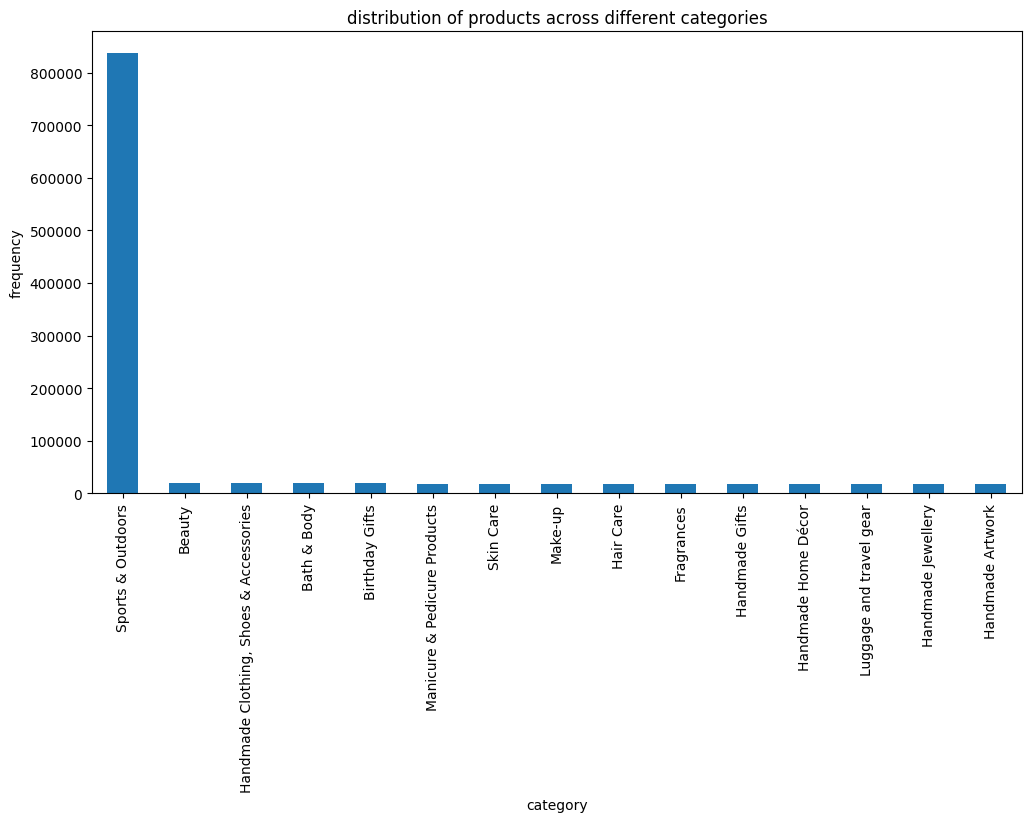

In [39]:

# Display the distribution of products across different categories using a bar chart.
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('distribution of products across different categories')
plt.xlabel('category')
plt.ylabel('frequency')
plt.show()



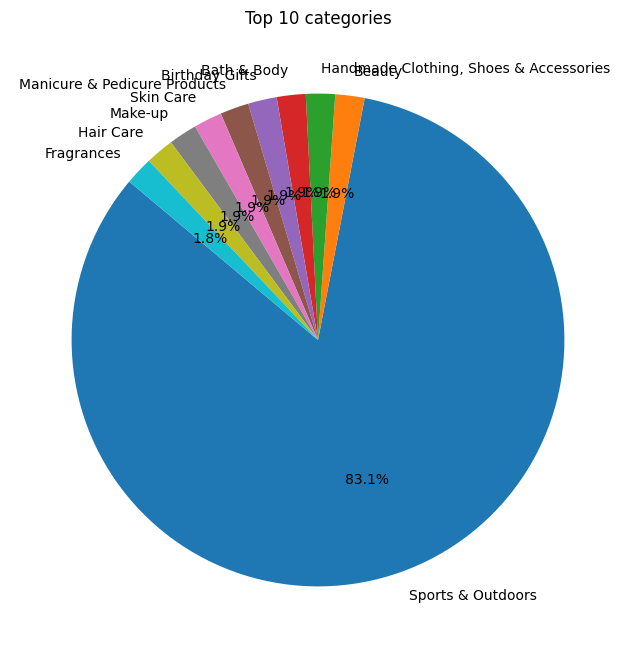

In [47]:
plt.figure(figsize=(8, 8))
top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 categories')
plt.ylabel('') 
plt.show()

The Sports & Beauty category shows a strong predominance over the other categories.

#Part 2: Delving into Product Pricing

In [46]:
# Calculate the mean, median, and mode for the price of products.
from scipy import stats
mode_price = stats.mode(df['price'])
print(mode_price) 
df["price"].describe().round(2)

ModeResult(mode=np.float64(9.99), count=np.int64(48922))


count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

The average price of a product is $89.24, while the most common price (mode) is $9.99.

This tells us that while the most frequently listed price is $9.99, there are also a significant number of higher-priced items that skew the average upward.

In [49]:
# Calculation of variance, standard deviation, range, and IQR for the 'price' column
variance = df['price'].var()
std_dev = df['price'].std()
price_range = df['price'].max() - df['price'].min()
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Range:", price_range)
print("Interquartile Range (IQR):", iqr)

Variance: 119445.48532254907
Standard Deviation: 345.60886175349884
Range: 100000.0
Interquartile Range (IQR): 36.0


The product prices show a significant variation.
Large standard deviation: A standard deviation of 345.61 also confirms a wide dispersion of prices. On average, prices deviate quite a bit from the mean.
Huge range: A range of 100000.0 shows that the difference between the highest and lowest priced product is very substantial. This indicates the presence of both extremely cheap and extremely expensive items.
Moderate IQR: While the IQR of 36.0 is smaller compared to the other metrics, it still represents a notable spread in the middle 50% of the data. This suggests that even within the more typical price range, there is a considerable difference in prices.

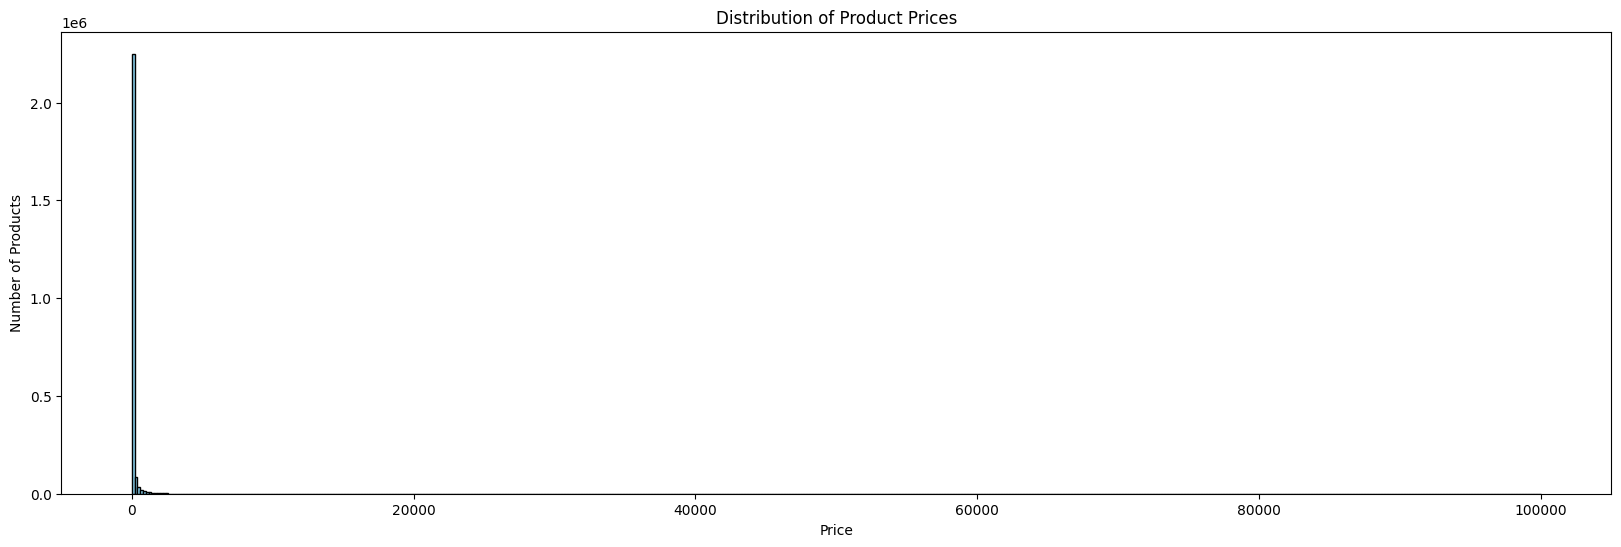

In [63]:
plt.figure(figsize=(20, 6))
plt.hist(df['price'], bins=500, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.show()

<Axes: >

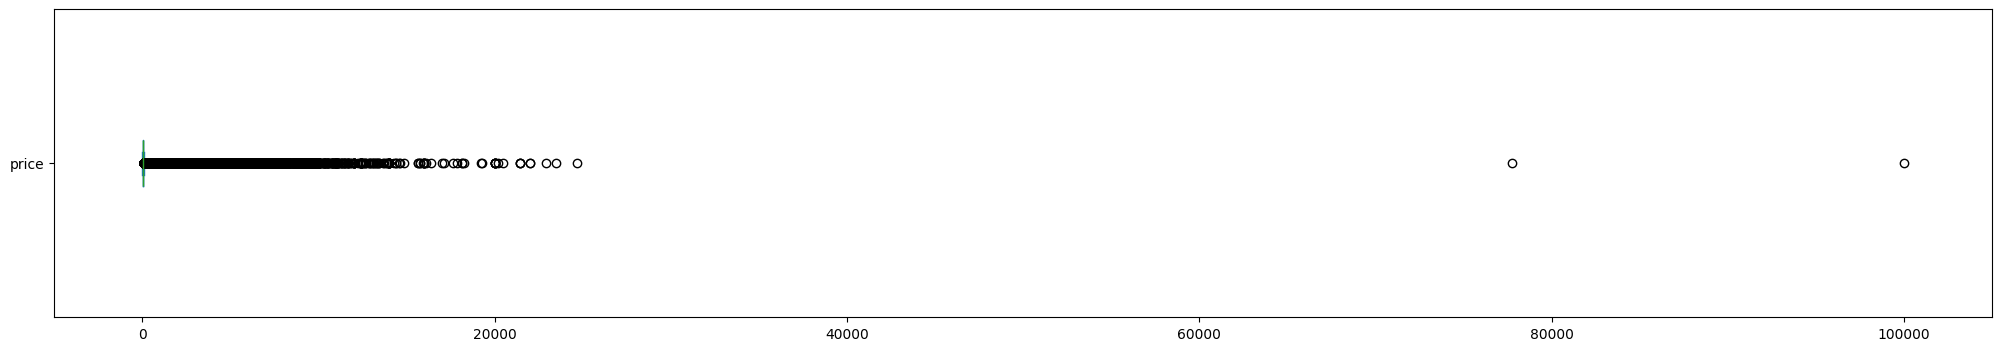

In [ ]:
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
df['price'].plot(kind='box', vert=False, figsize=(25, 4))

Are there products that are priced significantly higher than the rest?

Yes, there are products priced significantly higher than the rest. One product is priced at $100,000 and another at $77,752, which heavily influence the diagram and make it difficult to interpret. Additionally, 11 products cost more than $20,000.  Excluding these outliers would provide a clearer understanding of the price distribution within the central quantiles.

In [73]:
df[(df["price"] > 20000)].sort_values(by='price', ascending=False)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2008013,2259336,B091F5Y3CT,HB FBA Test Treadmill,0.0,0,100000.00,False,0,Sports & Outdoors
1987238,2235317,B0CDVKNBRV,Générique L.A 350° - I5 11400F - RTX 3050 8G -...,0.0,0,77752.00,False,0,Desktop PCs
1905315,2136904,B0CJSNFYVM,Abaodam decor christmas ornaments Desk Ornamen...,0.0,0,24674.59,False,0,Garden Storage & Housing
1408966,1551117,B0CHT331TN,BM4445-FI1-01200R10-03-E03 Driver,0.0,0,23482.73,False,0,Scanners & Accessories
319555,340285,B0CHYG6MNW,HEDUSA Halloween 3D Holographic Fan 3D Hologra...,0.0,0,22933.42,False,0,Projectors
1490285,1651376,B08M36F6S2,YXHUI Kids Girls Figure Skating Dress Long Sle...,0.0,0,21999.00,False,0,Sports & Outdoors
1490286,1651377,B08M31N65K,YXHUI Kids Girls Figure Skating Dress Long Sle...,0.0,0,21999.00,False,0,Sports & Outdoors
1907273,2138947,B0C8MVKYW2,Outdoor Furniture Wood Porch Swing Black Brown...,0.0,0,21464.82,False,0,Garden Storage & Housing
1907271,2138945,B0C8MWJRSH,Outdoor Furniture Wood Porch Swing Black Brown...,0.0,0,21464.82,False,0,Garden Storage & Housing
1907272,2138946,B0C8MVQB8R,Outdoor Furniture Wood Porch Swing Black Brown...,0.0,0,21464.82,False,0,Garden Storage & Housing


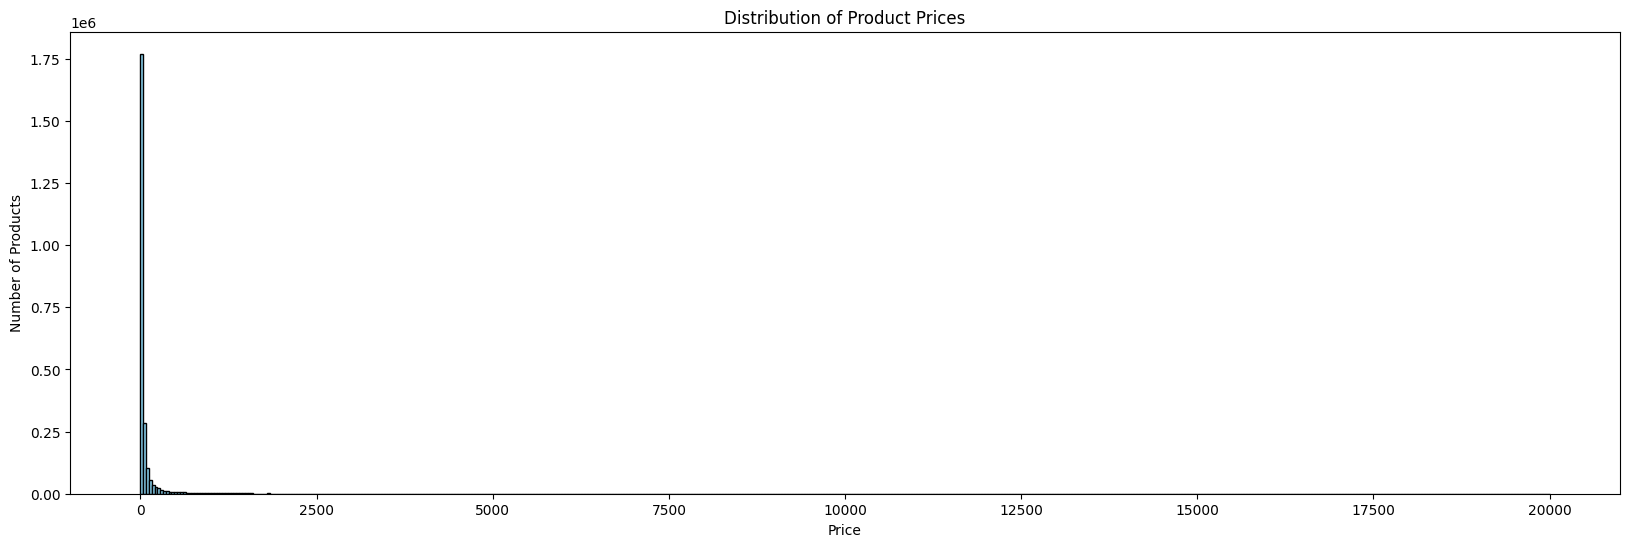

In [76]:
df_without_outliers20 = df[(df["price"] < 20000)]

plt.figure(figsize=(20, 6))
plt.hist(df_without_outliers20['price'], bins=500, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.show()

<Axes: >

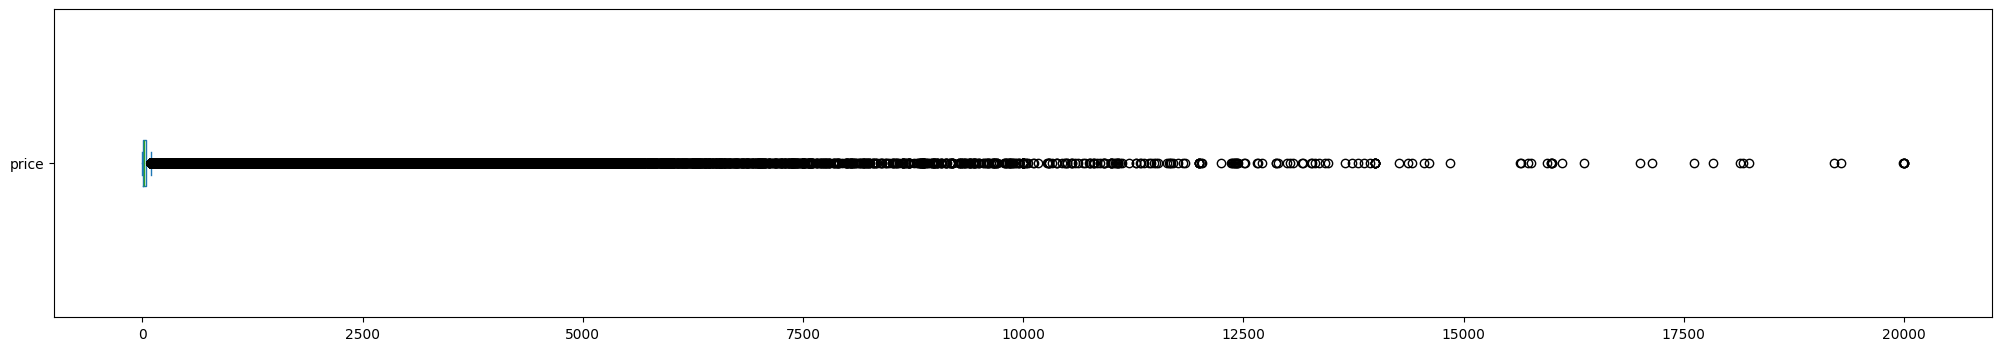

In [77]:
df_without_outliers20['price'].plot(kind='box', vert=False, figsize=(25, 4))

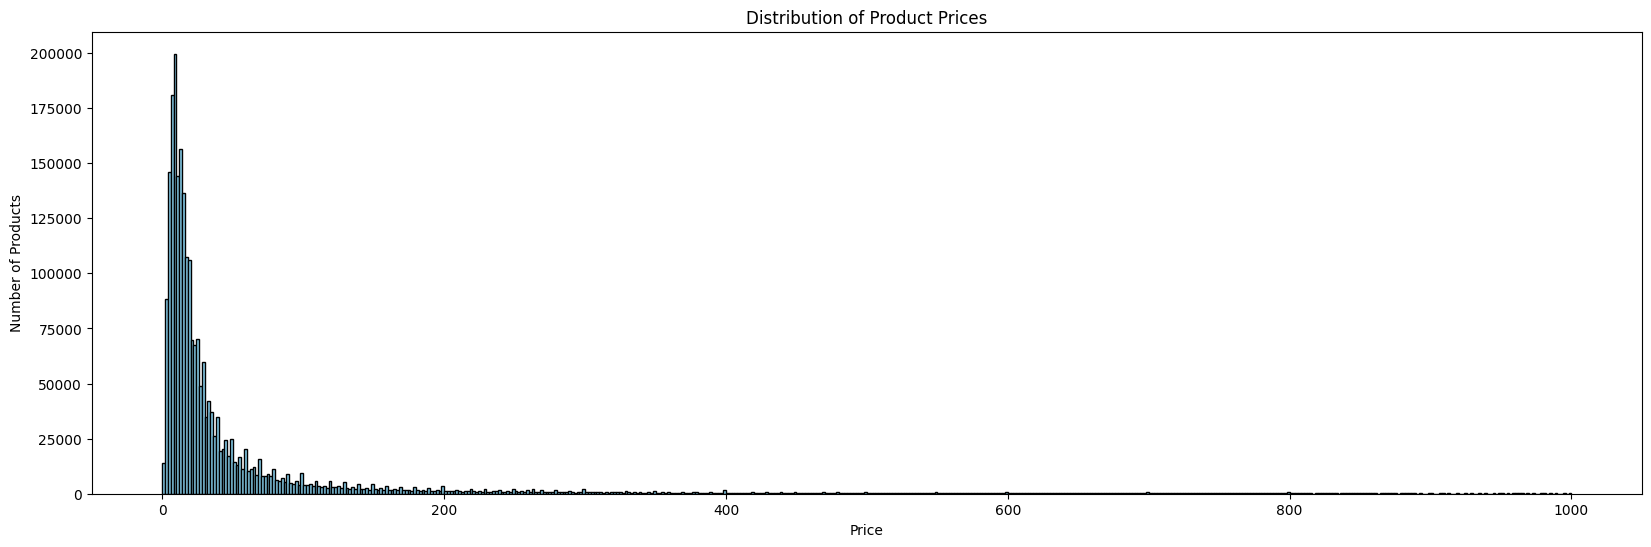

In [ ]:
# filter all products with a price less than 1000

df_without_outliers = df[(df["price"] < 1000)]

plt.figure(figsize=(20, 6))
plt.hist(df_without_outliers['price'], bins=500, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.show()

<Axes: >

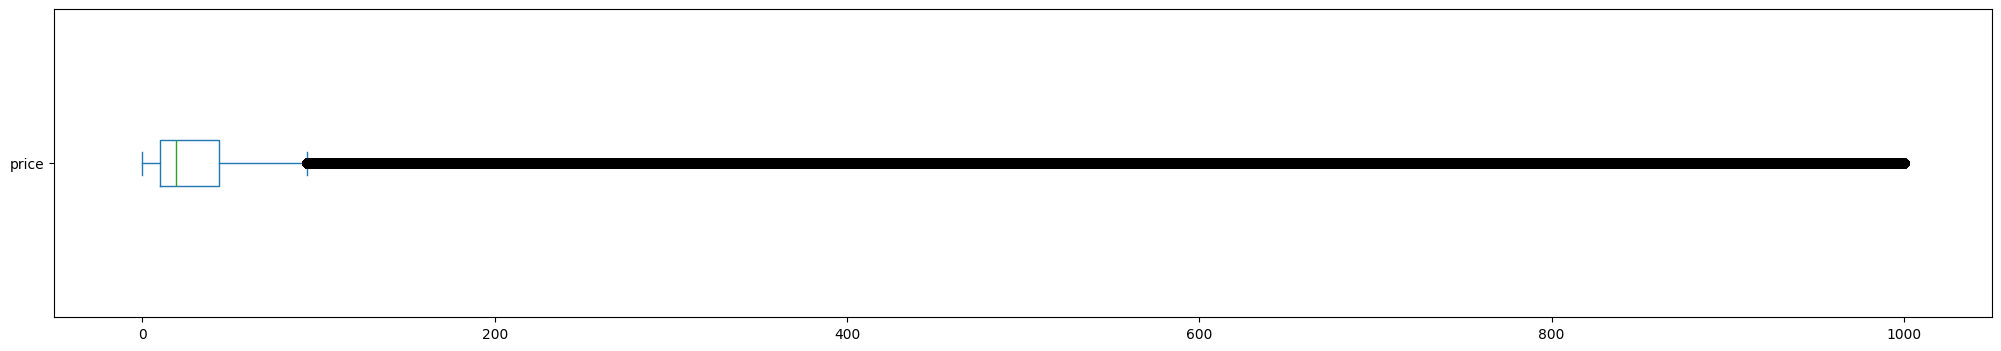

In [81]:
df_without_outliers['price'].plot(kind='box', vert=False, figsize=(25, 4))

#Part 3: Unpacking Product Ratings

In [83]:
# 1. Measures of Centrality:

# Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?

mode_price = stats.mode(df['stars'])
print(mode_price) 
df["stars"].describe().round(2)

ModeResult(mode=np.float64(0.0), count=np.int64(1225641))


count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

In [84]:
df['stars'][df['stars'] > 0].mean()

np.float64(4.31916076222691)

Mean: 2.15 - this suggests an overall slightly positive average rating, especially when considering that the mean calculated only from non-zero values equals 4.32.
Mode: 0.0 - The most frequent rating is actually 0. This indicates that a large portion of customers are not providing any rating at all or are giving the lowest possible rating.

In [85]:
# 2 Measures of Dispersion:
# Calculation of variance, standard deviation, range, and IQR for the 'stars' column
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
stars_range = df['stars'].max() - df['stars'].min()
iqr_stars = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print("Variance:", variance_stars)
print("Standard Deviation:", std_dev_stars)
print("Range:", stars_range)
print("Interquartile Range (IQR):", iqr_stars)

Variance: 4.817434029796862
Standard Deviation: 2.1948653785134207
Range: 5.0
Interquartile Range (IQR): 4.4


there is a wide variation in customer feedback. :

High Variance (4.82): A high variance indicates that the data points are spread out from the mean, suggesting a significant difference in customer ratings.   
Large Standard Deviation (2.19): A standard deviation of 2.19 further confirms this, as it measures the average amount of variation or dispersion of a set of values. In this case, it means that ratings deviate, on average, by a significant amount from the mean.   
Large Interquartile Range (IQR) (4.4): The IQR represents the range of the middle 50% of the data. An IQR of 4.4 out of a range of 5 indicates that even within the central portion of the ratings, there's still a large spread.   
Range of 5.0: the range of 5 shows that the ratings use the full scale that is available.

In [90]:
from scipy.stats import skew, kurtosis
skewness = skew(df['stars'])
kurt = kurtosis(df['stars'])

print(f"Skewness of rating column: {skewness}")
print(f"Kurtosis of rating column: {kurt}")

Skewness of rating column: 0.08120730776283354
Kurtosis of rating column: -1.926004642549839


Skewness: 0.0812
This value is very close to 0.
Therefore, the distribution of ratings is approximately symmetrical. This means it doesn't significantly lean towards higher or lower values.
Kurtosis: -1.926
This value is significantly less than 3.
This indicates a platykurtic distribution, meaning the distribution has lighter tails and a flatter peak than a normal distribution.

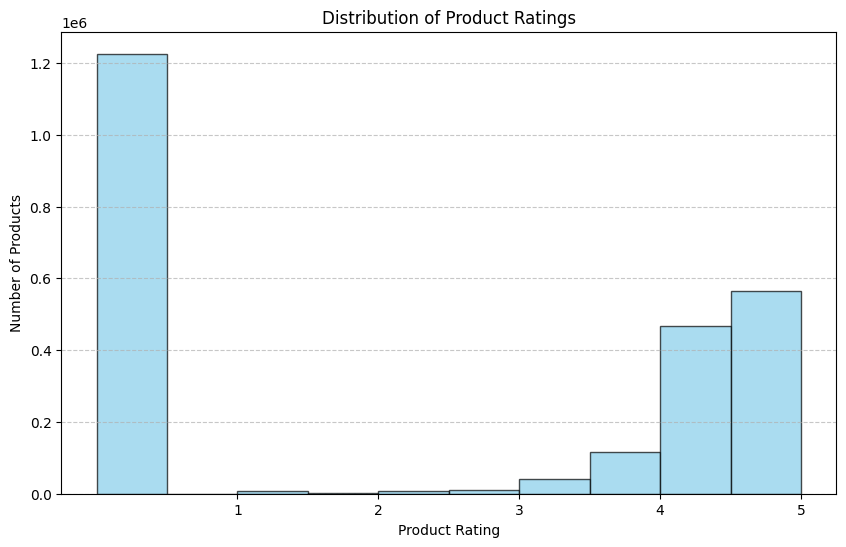

In [ ]:
# 4. Plot a histogram to visualize the distribution of product ratings.

plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Product Rating')
plt.ylabel('Number of Products')
plt.title('Distribution of Product Ratings')
plt.xticks(range(1, 6))  # X-axis with integer values from 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Axes: >

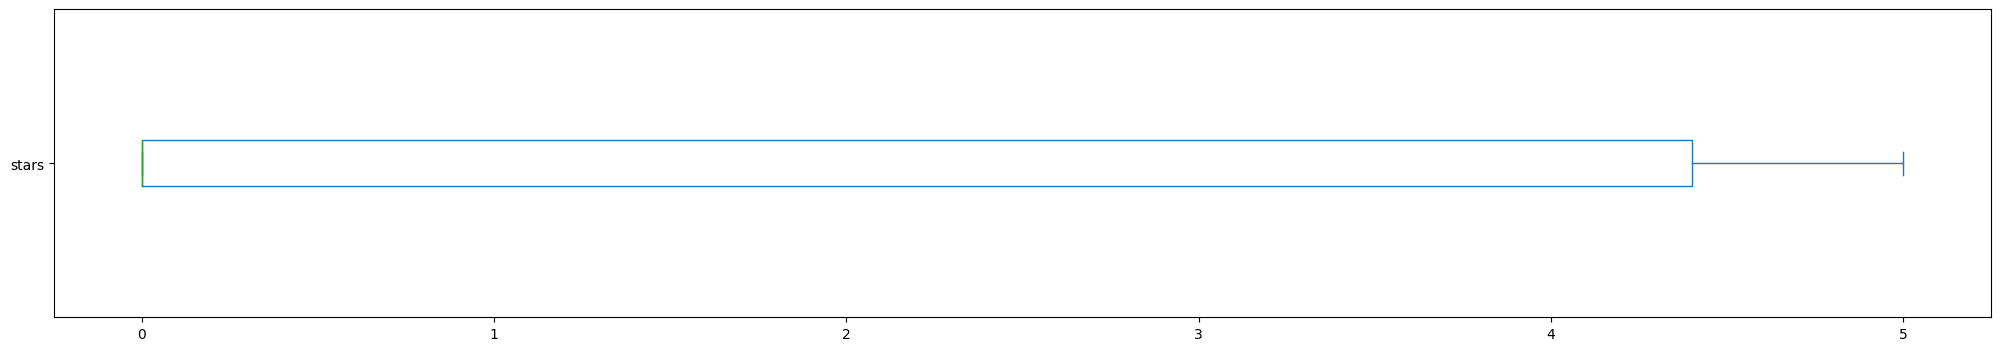

In [93]:
df["stars"].plot(kind='box', vert=False, figsize=(25, 4))

<Axes: >

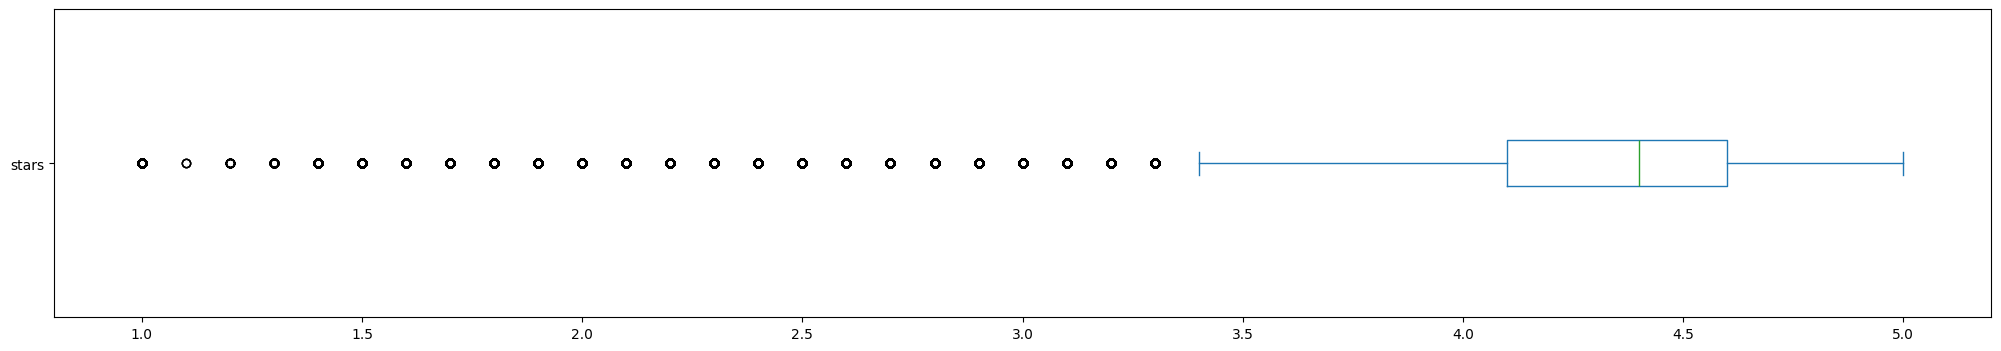

In [95]:
# only products with a rating greater than 0
df_without_outliers_stars = df[(df["stars"] > 0)]
df_without_outliers_stars["stars"].plot(kind='box', vert=False, figsize=(25, 4))

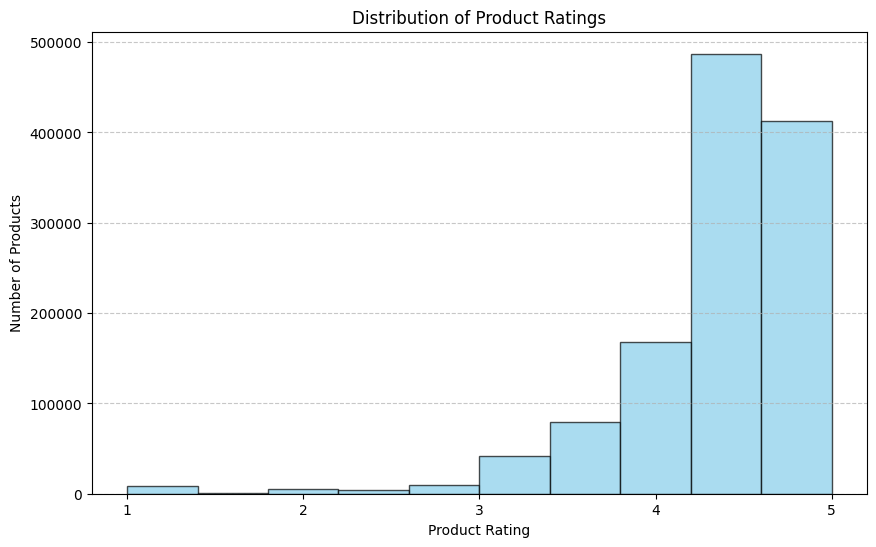

In [96]:
plt.figure(figsize=(10, 6))
plt.hist(df_without_outliers_stars['stars'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Product Rating')
plt.ylabel('Number of Products')
plt.title('Distribution of Product Ratings')
plt.xticks(range(1, 6))  # X-axis with integer values from 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
